# Creating a Convolved Optical Property

In this example we make a new optical property at 1 nm resolution based upon the ozone DBM cross sections which are natively at ~0.01 nm resolution.

In [1]:
%matplotlib inline

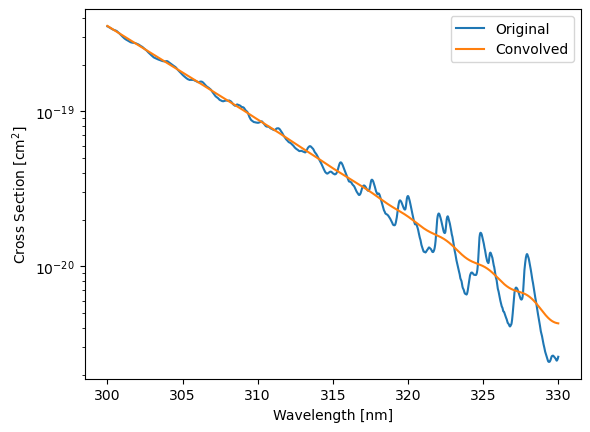

In [2]:
import sasktran as sk
import numpy as np
import matplotlib.pyplot as plt

# High resolution wavelength grid
wavel_nm = np.arange(300, 330, 0.01)

# Used for temperature/pressure
background_atmosphere = sk.MSIS90()

# High resolution ozone cross sections
hires = sk.O3DBM()

# Low resolution cross sections at 1 nm resolution
convolved = sk.OpticalPropertyConvolved(hires, psf_wavelength=wavel_nm, psf=1)

# Pull out the absorption cross section at 20 km for both optical properties
hires_xsec = hires.calculate_cross_sections(background_atmosphere, latitude=0,
                                            longitude=0, altitude=20000, wavelengths=wavel_nm, mjd=54732)

lowres_xsec = convolved.calculate_cross_sections(background_atmosphere, latitude=0,
                                                 longitude=0, altitude=20000, wavelengths=wavel_nm, mjd=54732)

plt.plot(wavel_nm, hires_xsec.absorption)
plt.plot(wavel_nm, lowres_xsec.absorption)
plt.yscale('log')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Cross Section [cm$^2$]')

plt.legend(['Original', 'Convolved'])
plt.show()